In [1]:
%matplotlib inline

from __future__ import division

import os
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from cartopy import util
import cartopy.crs as ccrs

In [2]:
plt.rcParams['figure.figsize'] = [10, 5] # larger inline plots
plt.rcParams['figure.dpi'] = 150         # keep fonts readable

In [4]:
data_dir = '/local2/home/MDTF/inputdata/model/QBOi.EXP1.AMIP.001/day/'
out_dir = '/local2/home/MDTF/inputdata/model/sh_test3/day/'
var_names = ['PRECT','T250','U200','V200','U250','U850',
             'V850','OMEGA500','Z250','FLUT']
var = var_names[0]
data_path = os.path.join(data_dir, 'QBOi.EXP1.AMIP.001.'+var+'.day.nc')
d_in = nc.Dataset(data_path, 'r')

In [9]:
temp = d_in.variables['PRECT'][:]
temp = temp.filled(0.0)
type(temp)

numpy.ndarray

In [13]:
n = 2**8
qtiles = np.linspace(0.0, 1.0, n)
bins = np.quantile(temp, qtiles, interpolation='linear')
lossy_temp = np.digitize(temp, bins)
lossy_temp = lossy_temp.astype('uint8',copy=False)

In [18]:
lossy_temp.shape

(2555, 192, 288)

In [19]:
out_dir = '/local2/home/MDTF/inputdata/model/sh_test3/day/'
out_path = os.path.join(out_dir, 'sh_test3.'+var+'.day.nc')
d_out = nc.Dataset(out_path, 'w')

# copy contents of d_in to d_out
d_out.setncatts(d_in.__dict__)
# copy dimensions
for name, dimension in d_in.dimensions.items():
    d_out.createDimension(
        name, (len(dimension) if not dimension.isunlimited() else None))
# copy all file data except for the excluded
for name, variable in d_in.variables.items():
    if name == 'PRECT':
        x = d_out.createVariable(name, variable.datatype, 
            variable.dimensions, zlib=True, complevel=9)
        d_out[name].setncatts(d_in[name].__dict__)
        d_out.variables['PRECT'][:] = lossy_temp
    else:
        x = d_out.createVariable(name, variable.datatype, variable.dimensions)
        d_out[name].setncatts(d_in[name].__dict__)
        d_out[name][:] = d_in[name][:]

d_out.close()

In [20]:
def quick_plot(lat, lon, data, title=''):
    data2, lon2 = util.add_cyclic_point(data, coord=lon) # avoid seam
    ax = plt.axes(projection=ccrs.PlateCarree())
    cf = plt.contourf(lon2, lat, data2, 60, transform=ccrs.PlateCarree())
    plt.colorbar(cf, extend ='both')
    ax.coastlines()
    if title != '':
        ax.set_title(title)
    plt.show()

/local2/home/anaconda2/envs/_fourier_test/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/local2/home/anaconda2/envs/_fourier_test/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: Input z must be a 2D array.

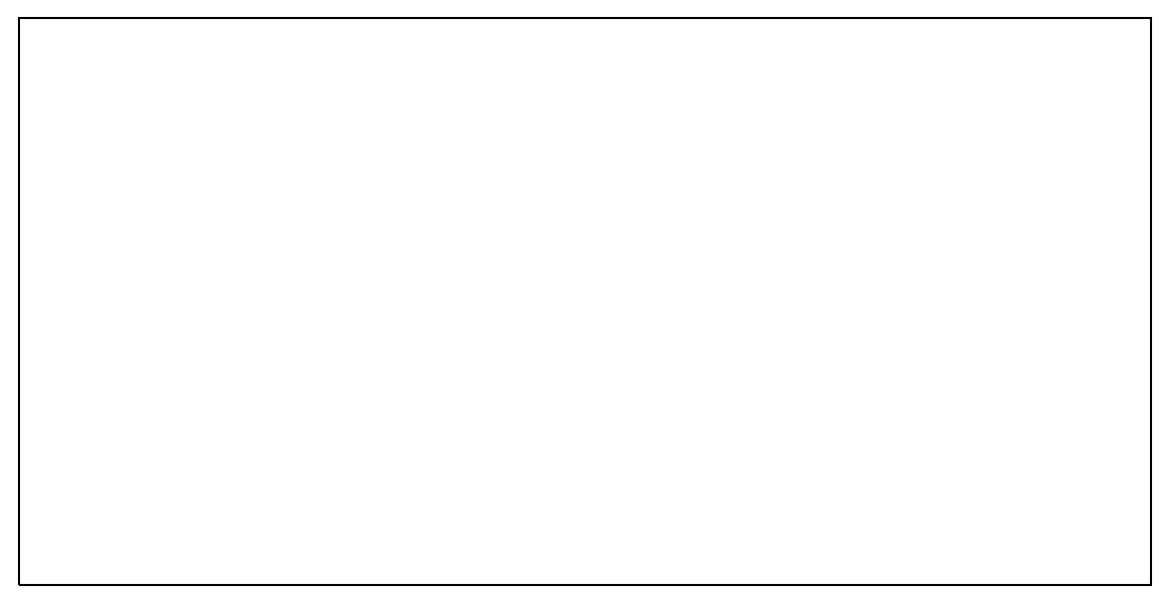

In [22]:
lats = d_in.variables['lat'][:]
lons = d_in.variables['lon'][:]
quick_plot(lats, lons, np.log10(temp))

In [ ]:
data_dir = '/local2/home/MDTF/inputdata/model/QBOi.EXP1.AMIP.001/day/'
out_dir = '/local2/home/MDTF/inputdata/model/sh_test3/day/'
var_names = ['PRECT','T250','U200','V200','U250','U850',
             'V850','OMEGA500','Z250','FLUT']
for var in var_names:
    print var
    data_path = os.path.join(data_dir, 'QBOi.EXP1.AMIP.001.'+var+'.day.nc')
    out_path = os.path.join(out_dir, 'sh_test2.'+var+'.day.nc')

    d_out = nc.Dataset(out_path, 'w')

    # copy contents of d_in to d_out
    d_out.setncatts(d_in.__dict__)
    # copy dimensions
    for name, dimension in d_in.dimensions.items():
        d_out.createDimension(
            name, (len(dimension) if not dimension.isunlimited() else None))
    # copy all file data except for the excluded
    for name, variable in d_in.variables.items():
        x = d_out.createVariable(name, variable.datatype, variable.dimensions)
        # copy variable attributes all at once via dictionary
        d_out[name].setncatts(d_in[name].__dict__)
        d_out[name][:] = d_in[name][:]

    d_in.close()
    d_out.close()